In [5]:
import tensorflow as tf
import os
import cv2
import matplotlib.pyplot as plt
from collections import Counter

In [6]:
raw_data_dir = '../data/raw_imgs/LIS-fingerspelling-dataset'
img_ex = cv2.imread(os.path.join(raw_data_dir, 'a', 'a_ANTONIA_1_bottom.JPG'))
img_ex.shape

(415, 622, 3)

In [7]:
dataset_raw = tf.keras.utils.image_dataset_from_directory(
    raw_data_dir,
    image_size=(224,224),
    batch_size=32,
    shuffle=True,
    seed=123
)

data_iterator = dataset_raw.as_numpy_iterator()
data_iterator

Found 6428 files belonging to 22 classes.


I0000 00:00:1748289444.187324    4939 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1753 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Ti Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x7f30340f7610>)

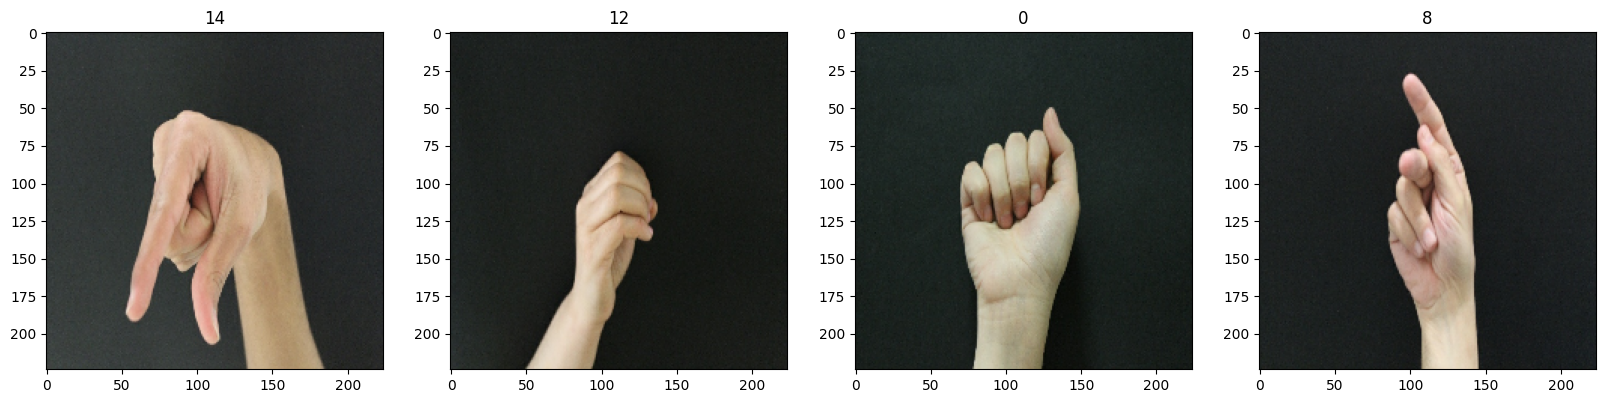

In [12]:
batch = data_iterator.next()

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

2025-05-26 22:04:32.750067: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


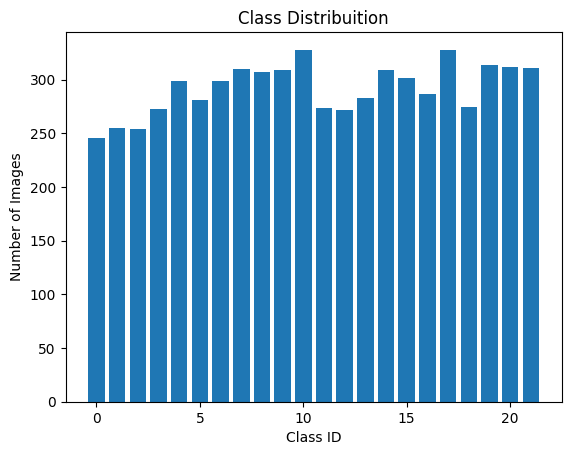

In [13]:
all_labels = []

for _, labels in dataset_raw:
    all_labels.extend(labels.numpy())

label_counts = Counter(all_labels)

# Plot labels distribuition
plt.bar(label_counts.keys(), label_counts.values())
plt.xlabel("Class ID")
plt.ylabel("Number of Images")
plt.title("Class Distribuition")
plt.show()